moral of this notebook: I made a minor mistake in choosing sampling range that ends up not mattering.

basically we should be sampling all the way to $z_*$ to properly compute the CMB lensing power spectrum (we do this in `ClKK_perfect`) because the CMB lensing kernel has support from redshift 0 to the source redshift. this is that minor difference we were seeing in `001.002`. however for other things like `LIMxCMBL`, the fact that we have sinc's that die quickly and sharp window functions means that, even if we dont sample all the way to the CMB source redshift, we're fine. Furthermore, the point where the correct and incorrect calculation differ the most (which ends up being <10\% anyways) is very high ell where (1) the N0 term completley washes away the differences and (2) we know doesnt contribute much SNR anyways. in other words, none of our results (besides the no N0 case in `011.007.2025-05-02-SNR-viz-comp-cmb.ipynb` which we do recompute) should be affected significantly by this minor error in choosing sampling bounds so I shall not sweat it.

In [1]:
import numpy as np

In [2]:
from LIMxCMBL.init import *
from LIMxCMBL.kernels import *

In [3]:
import matplotlib.pyplot as plt

In [4]:
ccl_CKK = ccl.angular_cl(cosmo, cmbk, cmbk, ells, 
                         p_of_k_a=cosmo.get_linear_power(),
                         p_of_k_a_lin=cosmo.get_linear_power(),
                        l_limber = -1, limber_max_error=1e-10)

In [5]:
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) # dimensionless

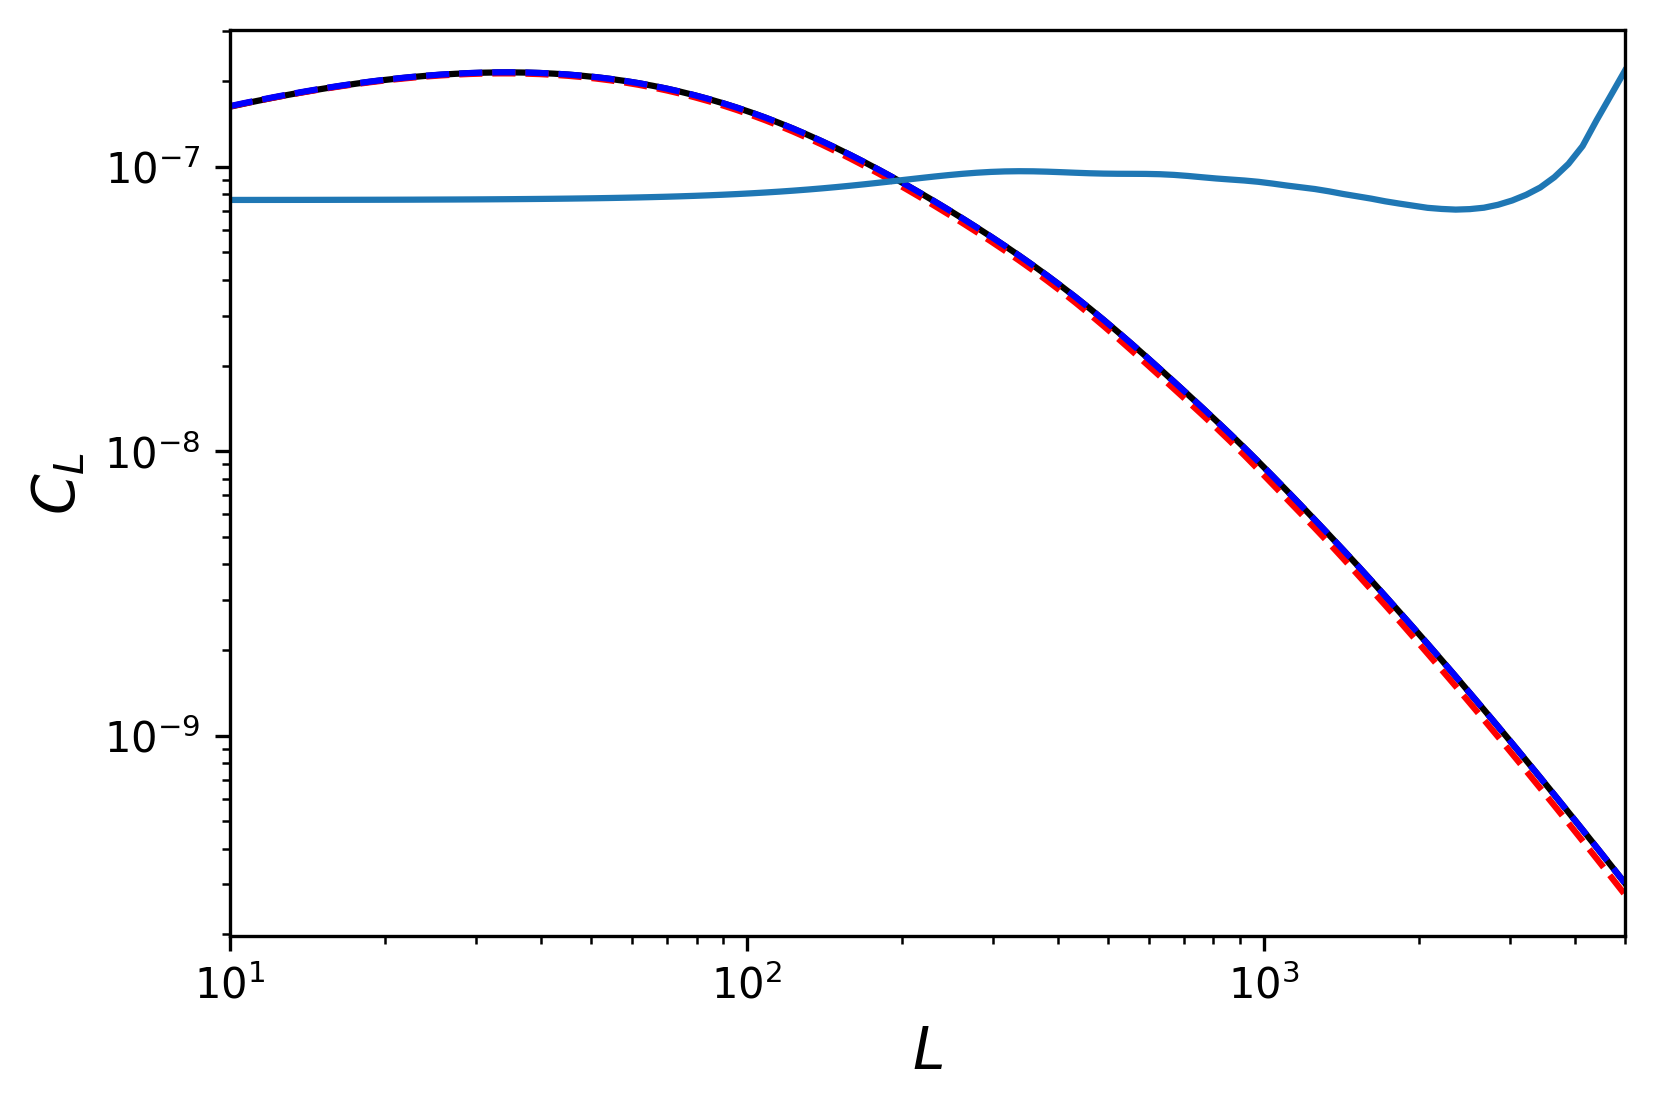

In [9]:
plt.figure(dpi=300, facecolor='w')

plt.plot(ells, ccl_CKK, c='k')
plt.plot(ells, ClKK, 'r--')
plt.plot(ells, ClKK_perfect, 'b--')

plt.loglog()
plt.xlabel(r'$L$', fontsize=14)
plt.ylabel(r'$C_L$', fontsize=14)
plt.xlim(10, 5000)
# plt.ylim(1e-10, 3e-7)

N0_ells = np.logspace(1, np.log10(5000), 500)
with open('data/'+'N0_so'+'.npy', 'rb') as f:
    N0 = np.load(f)

f_N0 = interp1d(x = N0_ells, y = N0)
plt.plot(ells, f_N0(ells))


(-0.3, 0.3)

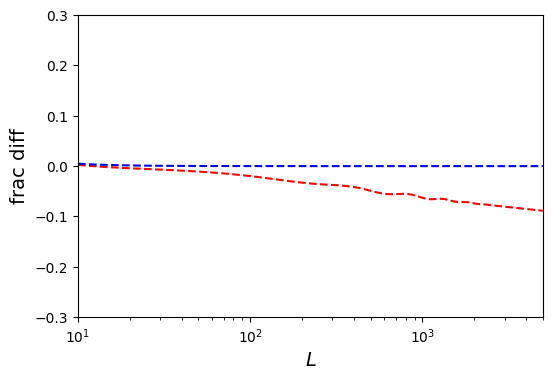

In [7]:
plt.figure(dpi=100, facecolor='w')

plt.plot(ells, (ClKK-ccl_CKK)/ccl_CKK, 'r--')
plt.plot(ells, (ClKK_perfect-ccl_CKK)/ccl_CKK, 'b--')

plt.xscale('log')
plt.xlabel(r'$L$', fontsize=14)
plt.ylabel(r'frac diff', fontsize=14)
plt.xlim(10, 5000)
plt.ylim(-.3, .3)

(-0.3, 0.3)

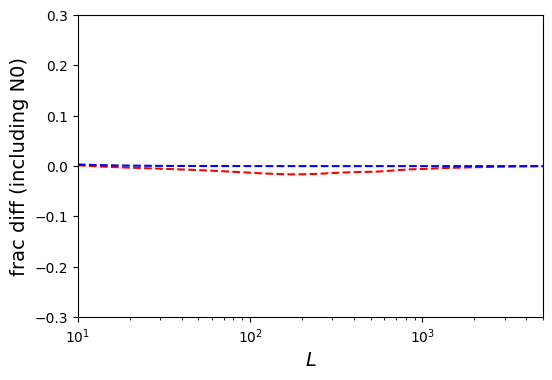

In [8]:
plt.figure(dpi=100, facecolor='w')

plt.plot(ells, (ClKK-ccl_CKK)/(ccl_CKK+f_N0(ells)), 'r--')
plt.plot(ells, (ClKK_perfect-ccl_CKK)/(ccl_CKK+f_N0(ells)), 'b--')

plt.xscale('log')
plt.xlabel(r'$L$', fontsize=14)
plt.ylabel(r'frac diff (including N0)', fontsize=14)
plt.xlim(10, 5000)
plt.ylim(-.3, .3)